In [6]:
# Step 1: Install libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip3 install pandas
!pip install matplotlib
!pip install xgboost
!pip install catboost
!pip install regex
!pip install scikit-learn
!pip install lightgbm
!pip install missingno
!pip install plotly.express


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release 

In [7]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv 
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
import matplotlib.pyplot as plt  # For data visualization

In [8]:
#Step 3: Aqcuire dataset
diabetes_cleaned = pd.read_csv('/workspaces/SP25-Project/data/diabetes_cleaned.csv')

/tmp/ipykernel_5783/1824289467.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_cleaned = pd.read_csv('/workspaces/SP25-Project/data/diabetes_cleaned.csv')


In [9]:
#Step 10: View cleaned dataframe
diabetes_cleaned.head(20)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,max_glu_serum_binary,A1Cresult_binary,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_binary
0,0,5,1,41,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,15,3,59,0,18,0,0,0,9,0,0,0,0,1,0,0,1
2,0,25,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0
3,1,35,2,44,1,16,0,0,0,7,0,0,0,0,1,0,0,1
4,1,45,1,51,0,8,0,0,0,5,0,0,0,0,1,0,0,1
5,1,55,3,31,6,16,0,0,0,9,0,0,0,0,1,0,0,1
6,1,65,4,70,1,21,0,0,0,7,0,0,0,0,1,0,0,1
7,1,75,5,73,0,12,0,0,0,8,0,0,0,0,1,0,0,0
8,0,85,13,68,2,28,0,0,0,8,0,0,0,0,1,0,0,1
9,0,95,12,33,3,18,0,0,0,8,0,0,0,0,1,0,0,1


In [11]:
#Correlation 
correlation_with_readmitted = diabetes_cleaned.corr(numeric_only=True)['readmitted_binary'].sort_values(key=abs, ascending=False)
print(correlation_with_readmitted)

readmitted_binary       1.000000
number_inpatient        0.165147
number_emergency        0.060747
number_diagnoses        0.049524
time_in_hospital        0.044199
num_medications         0.038432
insulin_binary          0.033278
num_lab_procedures      0.020364
number_outpatient       0.018893
age                     0.017634
A1Cresult_binary       -0.014337
num_procedures         -0.012227
max_glu_serum_binary    0.011398
race_Caucasian          0.007144
race_Other             -0.005962
race_Hispanic          -0.003415
race_Asian             -0.002578
Name: readmitted_binary, dtype: float64


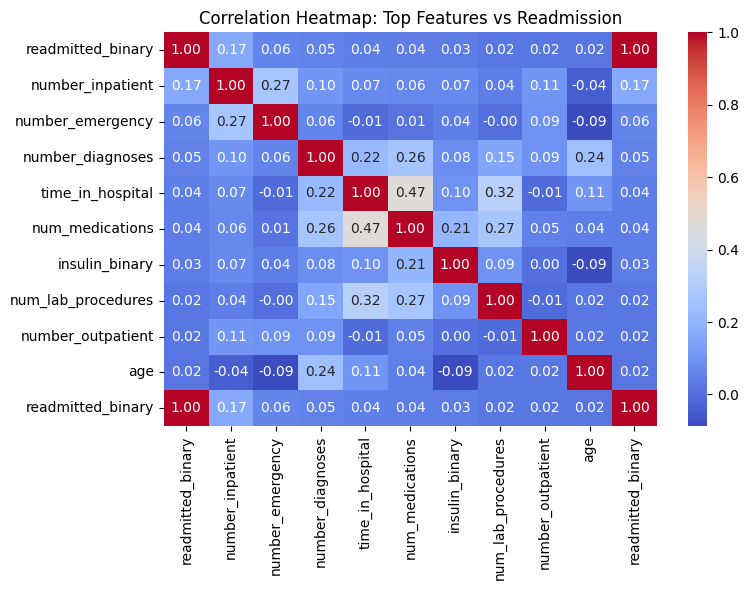

In [12]:
#Visualize Correlation of Top 10 Features - Heatmap 

# Determine top 10 
top_corr_features = correlation_with_readmitted.head(10).index.tolist()
top_corr_features.append('readmitted_binary')  # target feature

# Filter dataset for these columns
corr_matrix = diabetes_cleaned[top_corr_features].corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Top Features vs Readmission')
plt.tight_layout()
plt.show()

/tmp/ipykernel_5783/4088231081.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.head(10).values, y=corr.head(10).index, palette='magma')


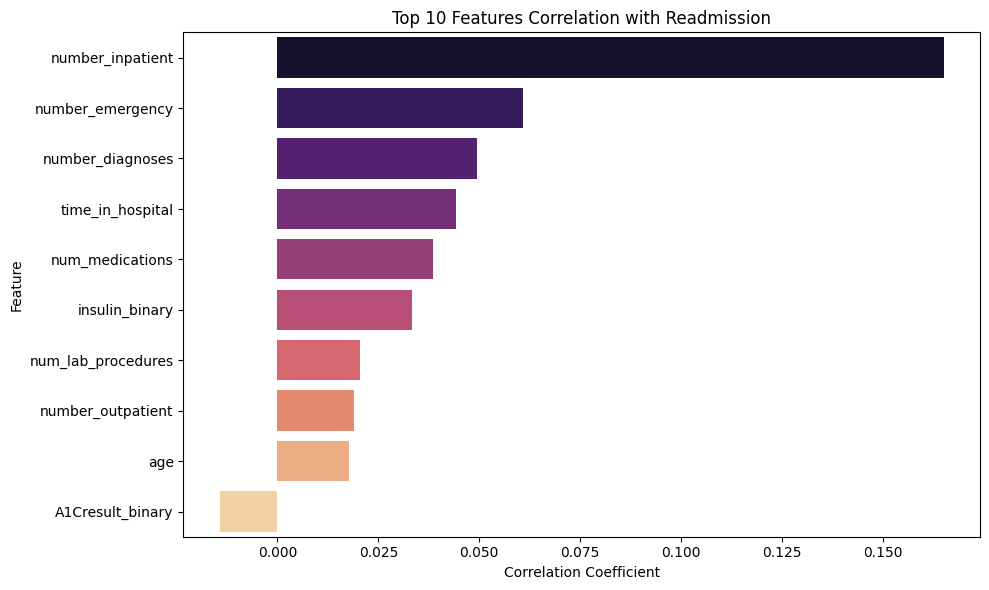

In [13]:
#Visualize Correlation of Top 10 Features - Bar Graph 

# Compute correlation with readmitted
corr = diabetes_cleaned.corr(numeric_only=True)['readmitted_binary'].sort_values(key=abs, ascending=False)

# Skip 'readmitted' itself
corr = corr.drop('readmitted_binary')

# Plot top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.head(10).values, y=corr.head(10).index, palette='magma')
plt.title('Top 10 Features Correlation with Readmission')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [14]:
#Visualization of Correlation between Race Features and Readmitted

# Extract columns that contain 'race'
race_columns = [col for col in diabetes_cleaned.columns if 'race' in col]

# Add 'readmitted' to the list of features we want to plot
race_columns.append('readmitted_binary')

# Get correlation between these features
race_corr = diabetes_cleaned[race_columns].corr(numeric_only=True)['readmitted_binary'].drop('readmitted_binary').sort_values(ascending=False)
print(race_corr)

race_Caucasian    0.007144
race_Asian       -0.002578
race_Hispanic    -0.003415
race_Other       -0.005962
Name: readmitted_binary, dtype: float64


/tmp/ipykernel_5783/2559703836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_corr.values, y=race_corr.index, palette='coolwarm')


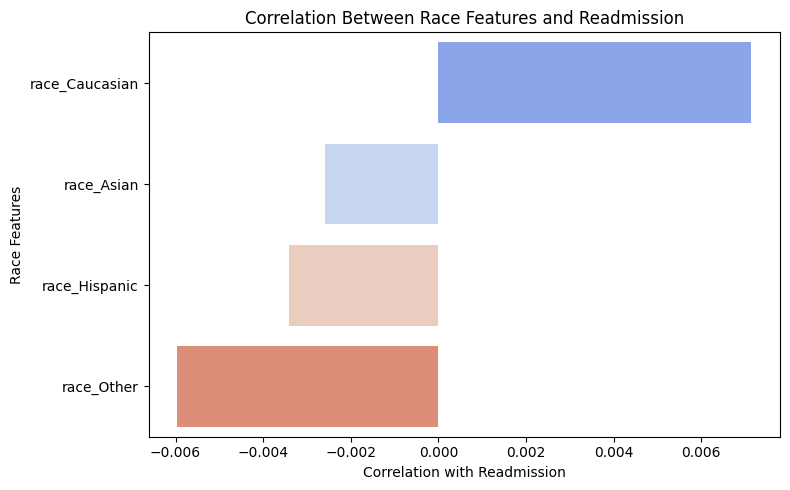

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=race_corr.values, y=race_corr.index, palette='coolwarm')
plt.title('Correlation Between Race Features and Readmission')
plt.xlabel('Correlation with Readmission')
plt.ylabel('Race Features')
plt.tight_layout()
plt.show()

In [17]:
#Machine Learning Models 
#Import ML/metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Visualizations 

import matplotlib.pyplot as plt

# Helper Function for Specificity
def calc_specificity(y_actual, y_pred, thresh=0.5):
    # True Negative Rate (Specificity) 
    TN = sum((y_pred < thresh) & (y_actual == 0))  # True Negatives
    FP = sum((y_pred >= thresh) & (y_actual == 0))  # False Positives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    return specificity

# Helper Function for Prevalence
def calc_prevalence(y_actual):
    # Proportion of positive samples
    prevalence = sum(y_actual) / len(y_actual)
    return prevalence


In [19]:
#Linear Regression 
#Determining Target Variables (Age and Readmitted)
X = diabetes_cleaned[['age']]
y = diabetes_cleaned['readmitted_binary']

#Split Dataset for Training (70%) and Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f"Predicted values: {y_pred[:10]}")

# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

Predicted values: [0.11431695 0.1079437  0.11113032 0.10157044 0.11113032 0.11750358
 0.11431695 0.10475707 0.11750358 0.11113032]
Mean Squared Error: 0.0996
R^2 Score: 0.0005


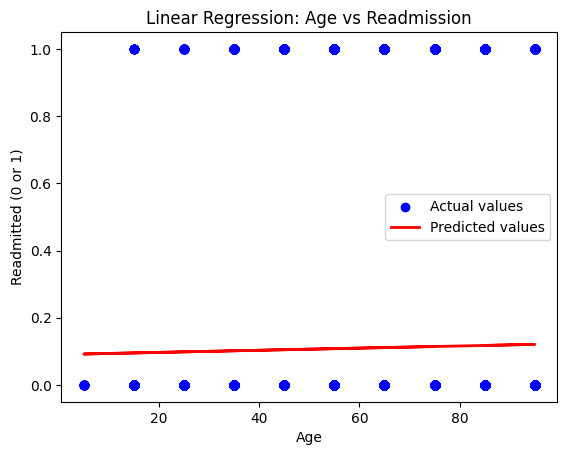

In [20]:
# Plotting Age vs Readmission
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values', linewidth=2)

plt.title('Linear Regression: Age vs Readmission')
plt.xlabel('Age')
plt.ylabel('Readmitted (0 or 1)')
plt.legend()
plt.show()

In [21]:
#Brainstorming to Fix "String/Unknown" Error while trying to run Linear Regression ML
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)

['gender']


In [22]:
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(diabetes_cleaned[col].unique())

#matches error code --> now need to determine what to do with those rows 


Column: gender
['0' '1' 'Unknown/Invalid' 1 0]


In [24]:
diabetes_cleaned[diabetes_cleaned['gender'] == 'Unknown/Invalid']

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,max_glu_serum_binary,A1Cresult_binary,race_Asian,race_Caucasian,race_Hispanic,race_Other,insulin_binary
30506,Unknown/Invalid,75,1,5,5,22,0,0,0,4,0,0,0,0,0,0,1,0
75551,Unknown/Invalid,65,1,38,1,6,0,0,0,5,0,0,0,0,0,0,0,0
82573,Unknown/Invalid,75,8,59,2,21,0,0,0,9,0,0,0,0,0,0,0,0


In [25]:
#since there are only 3 rows we will drop them 
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned['gender'] != 'Unknown/Invalid']

In [26]:
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(diabetes_cleaned[col].unique())


Column: gender
['0' '1' 1 0]


In [27]:
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)
#The issue still exists

['gender']


In [28]:
#Reconvert "gender" to bianary 
diabetes_cleaned['gender'] = diabetes_cleaned['gender'].astype(int)

/tmp/ipykernel_5783/1656661539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_cleaned['gender'] = diabetes_cleaned['gender'].astype(int)


In [29]:
#Check if there is still an object in "gender"
non_numeric_cols = diabetes_cleaned.select_dtypes(include=['object', 'string']).columns.tolist()
print(non_numeric_cols)

[]


In [30]:
#Linear Regression
#Set Target Variables 
y = diabetes_cleaned['readmitted_binary']
X = diabetes_cleaned.drop('readmitted_binary', axis=1)

#Train Model 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Run Linear Regression Model 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.0963
R^2 Score: 0.0286


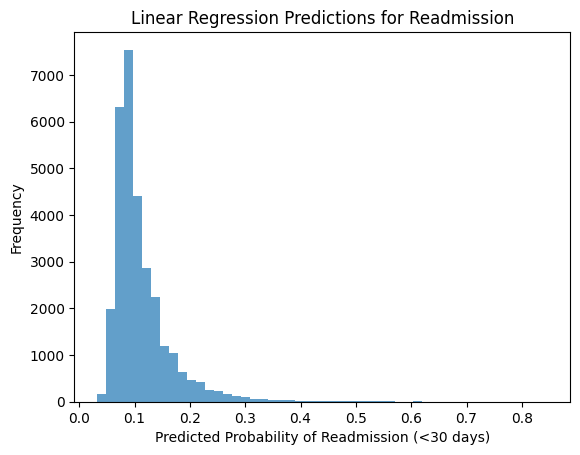

In [31]:
# Prediction
y_pred_cont = lr.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_cont):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_cont):.4f}")

import matplotlib.pyplot as plt

plt.hist(y_pred_cont, bins=50, alpha=0.7)
plt.title("Linear Regression Predictions for Readmission")
plt.xlabel("Predicted Probability of Readmission (<30 days)")
plt.ylabel("Frequency")
plt.show()

ValueError: x and y must be the same size

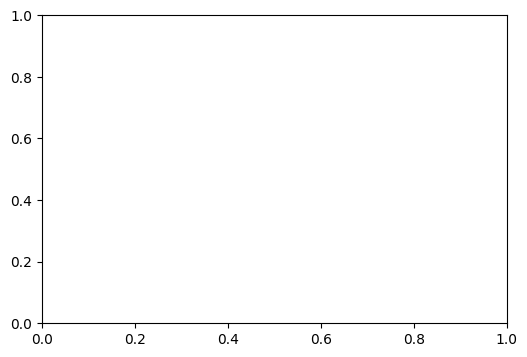

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')  # reference line
plt.xlabel('Actual Readmitted (<30 Days)')
plt.ylabel('Predicted Value (from Linear Regression)')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

In [33]:
#Linear Regression 

#Defining features and target variable
features = [
    'time_in_hospital',
    'num_procedures',
    'age',
    'num_lab_procedures',
    'number_inpatient',
    'number_diagnoses'
]

X = diabetes_cleaned[features]
y = diabetes_cleaned['readmitted_binary']  # Binary target: 0 or 1

#Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared Score: {r2:.3f}")


Mean Squared Error: 0.097
R-squared Score: 0.029


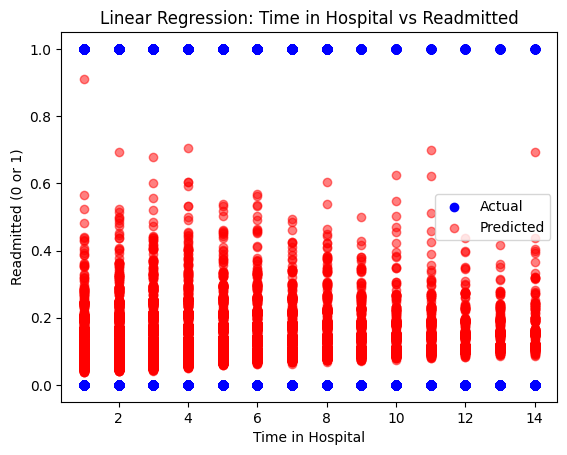

In [34]:
# Pick a single feature
x_feature = X_test['time_in_hospital']

# Actual vs predicted
plt.scatter(x_feature, y_test, color='blue', label='Actual')
plt.scatter(x_feature, y_pred, color='red', label='Predicted', alpha=0.5)

plt.title('Linear Regression: Time in Hospital vs Readmitted')
plt.xlabel('Time in Hospital')
plt.ylabel('Readmitted (0 or 1)')
plt.legend()
plt.show()

In [35]:
#Logistic Regression Model 
# 1. Set Target Variables 
y = diabetes_cleaned['readmitted_binary']
X = diabetes_cleaned.drop('readmitted_binary', axis=1)

# 2. Split Dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Model
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 4. Prediction from test data 
y_pred = log_reg.predict(X_test)

# 5. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")


Accuracy: 0.888
Precision: 0.509
Recall: 0.017
Specificity: 0.998
Prevalence: 0.112
AUC Score: 0.637


In [36]:
#Linear Regression 
#Define Variables 
y = diabetes_cleaned['time_in_hospital']  # Now this is the target
X = diabetes_cleaned.drop('time_in_hospital', axis=1)  # All other features

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 6.38
R-squared Score: 0.28


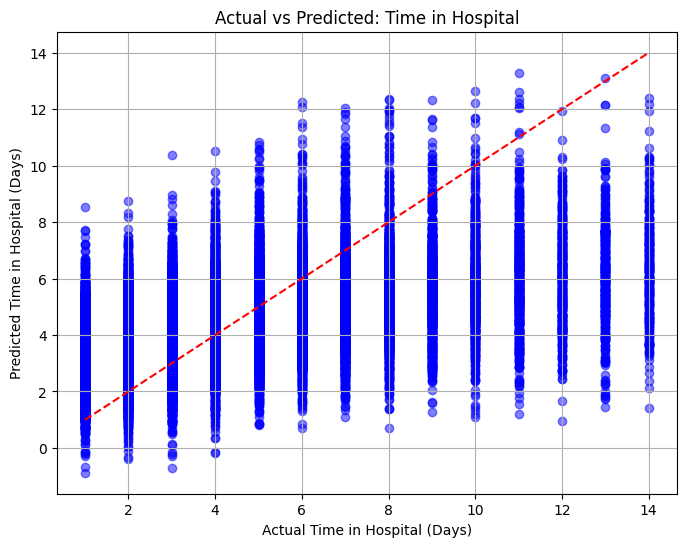

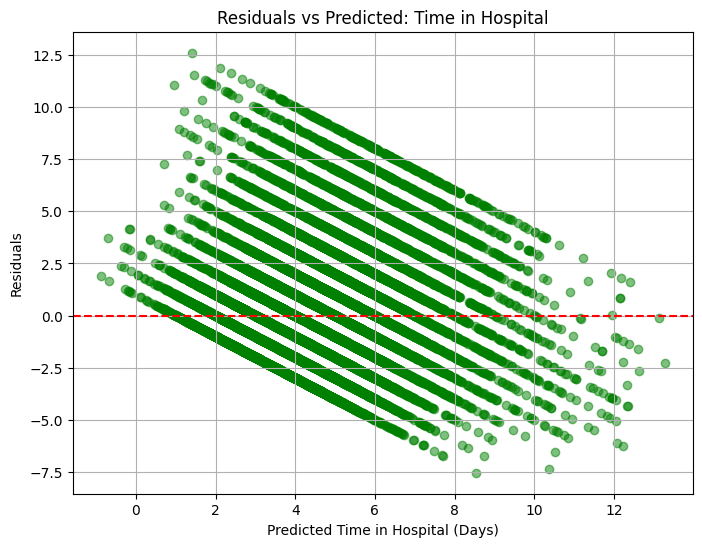

In [37]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted: Time in Hospital')
plt.xlabel('Actual Time in Hospital (Days)')
plt.ylabel('Predicted Time in Hospital (Days)')
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.title('Residuals vs Predicted: Time in Hospital')
plt.xlabel('Predicted Time in Hospital (Days)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [38]:
#Low AUC Score --> Goal is 70% or higher
#Resolution: Solve Data Class Imbalance with Sampling Down due to large sample size

In [41]:
#Treating Imbalance Logistic Regression Atempt #2 
# 1. Split the training data into positive (readmitted (1) = minroity)and negative (not readmitted within 30 days (0) = majority)

# 2. Combine X_train and y_train for resampling
train_df = X_train.copy()
train_df['readmitted_binary'] = y_train

# 3. Separate majority (not readmitted) and minority (readmitted) classes
majority = train_df[train_df.readmitted_binary == 0]
minority = train_df[train_df.readmitted_binary == 1]

# 4. Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,  # sample without replacement
    n_samples=len(minority),  # match minority class
    random_state=42
)

# 5. Combine minority and downsampled majority
downsampled_df = pd.concat([majority_downsampled, minority])

# 6. Separate back to X and y
X_train_bal = downsampled_df.drop('readmitted_binary', axis=1)
y_train_bal = downsampled_df['readmitted_binary']

# 7. Train Logistic Regression on balanced data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bal, y_train_bal)

# 8. Predict on original test set
y_pred = log_reg.predict(X_test)

# 9. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")

ValueError: Cannot sample 9879 out of arrays with dim 0 when replace is False

In [42]:
# 10. ROC Curve 
# Get the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 11. Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='purple', label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='brown', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

ValueError: multiclass format is not supported

In [44]:
# Logistic Regression Attempt #3 with Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import pandas as pd

# 1. Set Target and Features
y = diabetes_cleaned['readmitted_binary']
X = diabetes_cleaned.drop('readmitted_binary', axis=1)

# 2. Split Dataset (stratify keeps class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Combine training features and labels for downsampling
train_df = X_train.copy()
train_df['readmitted_binary'] = y_train

# 4. Separate majority and minority classes
majority = train_df[train_df.readmitted_binary == 0]
minority = train_df[train_df.readmitted_binary == 1]

# 5. Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# 6. Combine back into a balanced dataset
downsampled_df = pd.concat([majority_downsampled, minority])

# 7. Separate features and target again
X_train_bal = downsampled_df.drop('readmitted_binary', axis=1)
y_train_bal = downsampled_df['readmitted_binary']

# 8. Scale
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)  # Fit and transform train
X_test_scaled = scaler.transform(X_test)  # Only transform test

# 9. Train Logistic Regression on scaled, balanced data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bal_scaled, y_train_bal)

# 10. Predict on scaled test set
y_pred = log_reg.predict(X_test_scaled)

In [45]:
# 11. Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = calc_specificity(y_test, y_pred)
prevalence = calc_prevalence(y_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Prevalence: {prevalence:.3f}')
print(f"AUC Score: {auc:.3f}")

Accuracy: 0.671
Precision: 0.167
Recall: 0.489
Specificity: 0.694
Prevalence: 0.112
AUC Score: 0.599


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Metrics for Decision Tree on Validation Data:
AUC: 0.614
Accuracy: 0.884
Recall: 0.018
Precision: 0.225
Specificity: 0.992


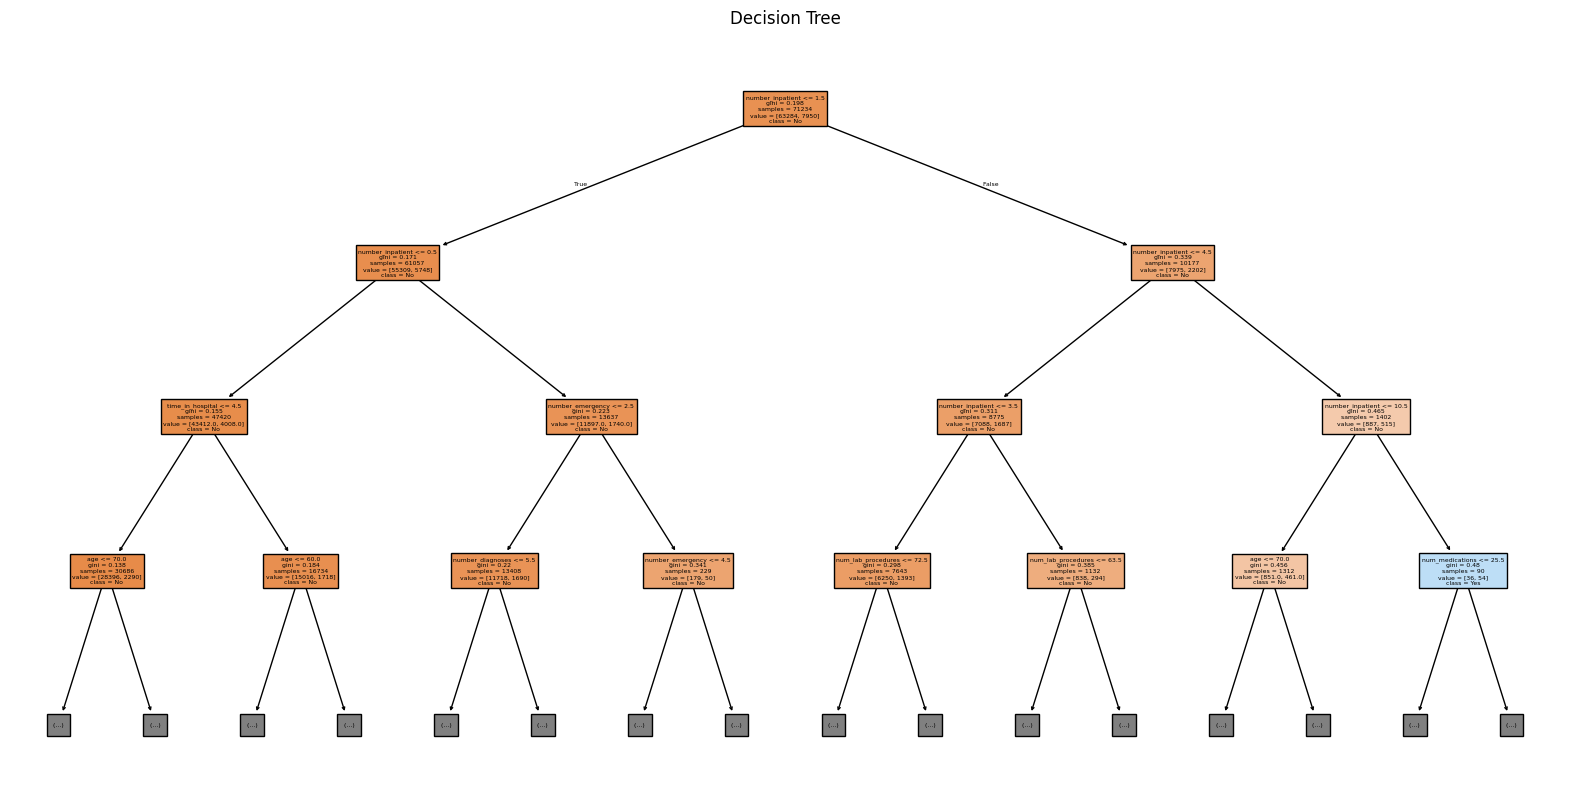

In [47]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Define variables 
X = diabetes_cleaned.drop('readmitted_binary', axis=1)
y = diabetes_cleaned['readmitted_binary']

# 2. Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Decision Tree
dc_clf = DecisionTreeClassifier(random_state=42, max_depth=10)
dc_clf.fit(X_train, y_train)

# 4. Prediction 
dc_preds_proba = dc_clf.predict_proba(X_valid)[:, 1]
dc_preds = dc_clf.predict(X_valid)

# 5. Helper functions for evaluation
def calc_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

def print_report(y_true, y_probs, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    auc = roc_auc_score(y_true, y_probs)
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    specificity = calc_specificity(y_true, y_pred)
    
    print(f"AUC: {auc:.3f}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Specificity: {specificity:.3f}")
    
    return auc, acc, recall, precision, specificity

# 6. Evaluate model
print("Metrics for Decision Tree on Validation Data:")
print_report(y_valid, dc_preds_proba, threshold=0.5)

# 7. Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dc_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=3)
plt.title("Decision Tree")
plt.show()